# TODO(after verifying whether there are repeatable forces acting along activation fronts): Studying activation front curvature
Tim Tyree<br>
5.3.2021

In [1]:
from lib.my_initialization import *
from lib import *
from lib.measure.curvature import *
from scipy import ndimage
%load_ext autoreload
%autoreload 2

/Users/timothytyree/opt/miniconda3/envs/pyenv/lib/python3.9/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
#DONE: import example and compute arclen_values
#DONE: interpolate txt to contour nodes
#DONE: get a sample activation front identified in terms of arcVc_values
#DONE: plot curvature versus sigma
# - __TODO__: save an activation front curvature values versus time as .csv
#TODO: see how ^that evolves with time
#TODO(and then...): use ^this method to compute apparent forces from a time series of positions
# - ...TODO: come up with some simple rules for curvature versus time
# - ...TODO: use intersections to compute interactions between activation fronts

Method for smooth numerical curvature
1. fitting a BSpline through the data points and 
1. computing the curvature as a function of derivatives of ^that BSpline fit.

In [7]:
# #load a mesh from Luo-Rudy
# ic_fn=search_for_file()
try:
    ic_fn=f"{nb_dir}/Data/initial-conditions-suite-3-LR/ic-out/ic008.33.npz"
    txt=load_buffer(ic_fn)
    t=0
except FileNotFoundError as e:
    ic_fn=f"{nb_dir}/Data/initial-conditions-suite-3-LR/ic-in/ic008.33.npz"
    txt=load_buffer(ic_fn)
    t=0   
    
save_folder=f"{nb_dir}/Figures/mov"    
ds=5.
frameno=0
DT=2.
dt=0.01
nsteps_per_DT=int(DT/dt)
save_every_n_frames=50

inVc,outVc,inmhjdfx,outmhjdfx,dVcdt=unstack_txt(txt)
width,height=txt.shape[:2]
# V_threshold=-50;
# V_threshold=-40;
V_threshold=-30;
dt=0.01

# comp_dict_topo_full_color=get_comp_dict_topo_full_color(width=width,height=height,level1=V_threshold,level2=0.)
# get_one_step at this dt
__, arr39, one_step = get_one_step_explicit_synchronous_splitting(
    nb_dir,dt=dt,width=width,height=height,ds=ds,diffCoef=0.0005,Cm=1.0)
# comp_dict_topo_simple=get_comp_dict_topo_simple(width=width,height=height,level1=V_threshold,level2=0)
txt=stack_txt(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)

img_prev=txt[...,0].copy()
inVc,outVc,inmhjdfx,outmhjdfx,dVcdt=unstack_txt(txt)
for n in range(nsteps_per_DT):
    one_step(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
    t+=dt
txt=stack_txt(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
img=inVc[...,0]
dimgdt=dVcdt[...,0]

In [8]:
comp_tips=get_comp_tips(width,height,V_threshold)
dict_tips=comp_tips(img,img_prev,dimgdt,t,txt)
pdict=ParticlePBCDict(dict_tips=dict_tips, width=width, height=width)#, **kwargs)

In [ ]:
# beep(1)
# splprep?

In [ ]:
dict_tips=comp_tips(img,img_prev,dimgdt,t,txt)

In [ ]:
dict_tips=comp_tips(img,img_prev,dimgdt,t,txt)

In [ ]:
xy_values_lst =dict_tips['lesser_xy_values']
c_values_lst =dict_tips['lesser_curvature_values']
arclen_lst=dict_tips['lesser_arclen']
i=1
c_values=np.abs(c_values_lst[i])#.copy()
xy_values=xy_values_lst[i]
arclen=arclen_lst[i]
# #compute moving average of c_values
# for k in range(navg):
#     c_values[1:]=(c_values[1:]+c_values[:-1])/2.

In [ ]:
beep(1)

In [ ]:
plt.scatter(x=xy_values[:,0],y=xy_values[:,1],c=c_values,s=50,cmap='Reds',vmin=0,vmax=10)
plt.show()

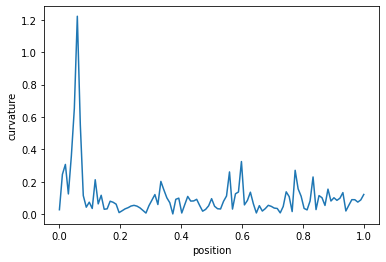

In [82]:
dict_curvature=compute_curvature(xy_values)
curvature_values=dict_curvature['curvature']
sigma_unitless_values=np.linspace(0,1,curvature_values.shape[0])
plt.plot(sigma_unitless_values,curvature_values)
plt.xlabel('position')
plt.ylabel('curvature')
plt.show()

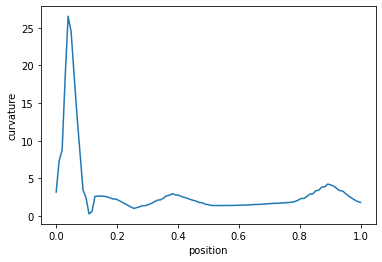

In [83]:
curvature_values=c_values
sigma_unitless_values=np.linspace(0,1,curvature_values.shape[0])
plt.plot(sigma_unitless_values,curvature_values)
plt.xlabel('position')
plt.ylabel('curvature')
plt.show()

In [38]:
# from scipy.interpolate import splprep, splev
# from scipy import interpolate

# def comp_curvature(xy_values,s=2):
#     '''s is a smoothing parameter. s=0 forces agreement with xy_values, but does not produce smooth curvature
#     xy_values is an Nx2 np.array discretizing a continuous curve
#     Note that (i) we force interpolation by using s=0, 
#     (ii) the parameterization, u, is generated automatically.
#     Example Usage:
#     curvature_values=compute_curvature(xy_values)
#     '''
#     x=xy_values[:,0]
#     y=xy_values[:,1]
#     tck, u = splprep([x, y],s=s)#s=0)
#     new_points = splev(u, tck)
#     dxds,dyds = splev(u, tck, der=1)
#     dx2ds2,dy2ds2 = splev(u, tck, der=2)
#     curvature_values = np.abs(dx2ds2 * dyds - dxds * dy2ds2) / (dxds * dxds + dyds * dyds)**1.5
#     return curvature_values
splprep?
# def comp_interpolated_points(xy_values,s=2):
#     '''s is a smoothing parameter. s=0 forces agreement with xy_values, but does not produce smooth curvature
#     xy_values is an Nx2 np.array discretizing a continuous curve
#     Note that (i) we force interpolation by using s=0, 
#     (ii) the parameterization, u, is generated automatically.
#     Example Usage:
#     new_points=comp_interpolated_points(xy_values)
#     '''
#     x=xy_values[:,0]
#     y=xy_values[:,1]
#     tck, u = splprep([x, y],s=s)#s=0)
#     new_points = splev(u, tck)
#     return new_points

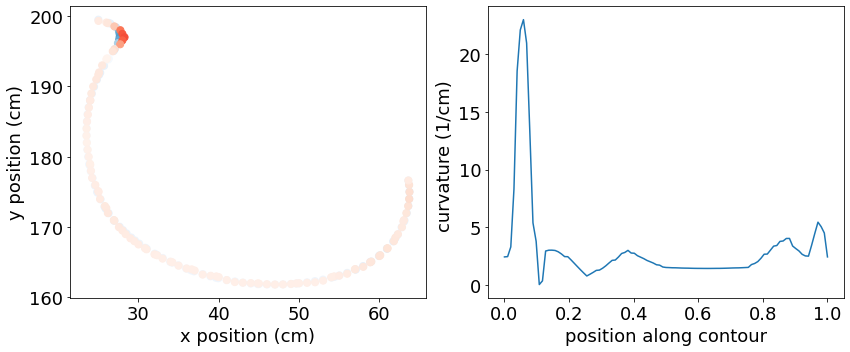

In [39]:
dsdpixel=0.025 #cm per pixel
xy_values_lst =dict_tips['lesser_xy_values']
xy_values=xy_values_lst[i]
# xy_values=xy_values[::-1].copy()
new_points=comp_interpolated_points(xy_values)
curvature_values=comp_curvature(xy_values)/dsdpixel
sigma_unitless_values=np.linspace(0,1,curvature_values.shape[0])
sigma_values=arclen*sigma_unitless_values
c_values=curvature_values

#Notice that (i) we force interpolation by using s=0, (ii) the parameterization, u, is generated automatically. Now plot the result:
fontsize=18
figsize=(12,5)
fig, axs = plt.subplots(ncols=2,figsize=figsize)
ax=axs[0]
ax.scatter(x=new_points[0], y=new_points[1],c=c_values,s=50,cmap='Blues',vmin=0,vmax=1./dsdpixel)#, 'r-')
ax.scatter(x=xy_values[:,0], y=xy_values[:,1],c=c_values,s=50,cmap='Reds',vmin=0,vmax=1./dsdpixel)#, 'r-')
ax.set_xlabel('x position (cm)',fontsize=fontsize)
ax.set_ylabel('y position (cm)',fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=0)

ax=axs[1]
ax.plot(sigma_unitless_values,c_values)
ax.set_xlabel('position along contour',fontsize=fontsize)
ax.set_ylabel('curvature (1/cm) ',fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=0)

plt.tight_layout()
plt.show()

DONE: ensured reversing twice does not change the numerical results.


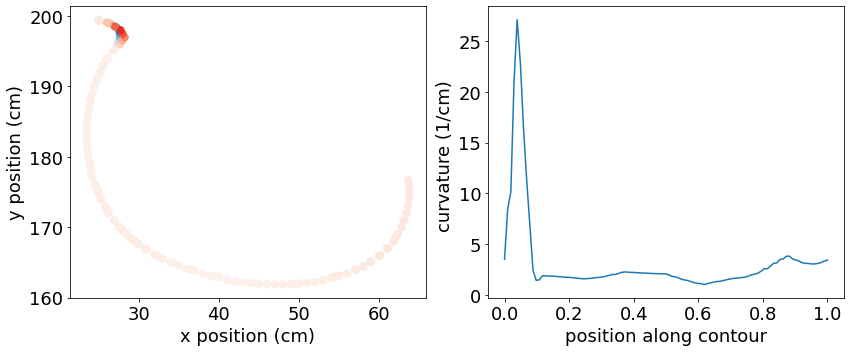

In [66]:
dsdpixel=0.025 #cm per pixel
xy_values_lst =dict_tips['lesser_xy_values']
xy_values=xy_values_lst[i]
xy_values=xy_values[::-1].copy()
new_points=comp_interpolated_points(xy_values)
curvature_values=comp_curvature(xy_values)/dsdpixel
sigma_unitless_values=np.linspace(0,1,curvature_values.shape[0])
sigma_values=arclen*sigma_unitless_values
c_values=curvature_values

#Notice that (i) we force interpolation by using s=0, (ii) the parameterization, u, is generated automatically. Now plot the result:
fontsize=18
figsize=(12,5)
fig, axs = plt.subplots(ncols=2,figsize=figsize)
ax=axs[0]
ax.scatter(x=new_points[0], y=new_points[1],c=c_values,s=50,cmap='Blues',vmin=0,vmax=1./dsdpixel)#, 'r-')
ax.scatter(x=xy_values[:,0], y=xy_values[:,1],c=c_values,s=50,cmap='Reds',vmin=0,vmax=1./dsdpixel)#, 'r-')
ax.set_xlabel('x position (cm)',fontsize=fontsize)
ax.set_ylabel('y position (cm)',fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=0)

ax=axs[1]
ax.plot(sigma_unitless_values[::-1],c_values)
ax.set_xlabel('position along contour',fontsize=fontsize)
ax.set_ylabel('curvature (1/cm) ',fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=0)

plt.tight_layout()
print('DONE: ensured reversing twice does not change the numerical results.')
plt.show()

__Result__
- for s=0,1: The curvature value at one end appears higher, but does not appear to jump...
    - it would be ideal for the curvature value to be invarient to reversing the order of xy points before and after computing the curvature.  This would support the sigma parameter to be an agnostic book keeping device.
    - Flipping the boundary changed the results... :(
- for s=2: this works great!

# TODO: visualize the motion of a curvature spike dispersing in an activation front as time passes

# TODO: integrate the smooth curvature values into the current comp_curvature pipeline

# debug comp_curvature for the apparent edge cases

In [40]:
# xp,yp=(np.array([ 0.07705342,  0.07705342]), np.array([-0.09176826, -0.09176826])) 

In [45]:
# #cutting off the weird part
# jump = np.sqrt(np.diff(xp)**2 + np.diff(yp)**2) 
# smooth_jump = ndimage.gaussian_filter1d(jump, 5, mode='wrap')  # window of size 5 is arbitrary
# limit = 2*np.median(smooth_jump)    # factor 2 is arbitrary
# xn, yn = xp[:-1], yp[:-1]
# xn = xn[(jump > 0) & (smooth_jump < limit)]
# yn = yn[(jump > 0) & (smooth_jump < limit)]

In [46]:
# plt.plot(xp, yp, 'o', markersize=2)
# plt.plot(xn, yn, 'r', alpha=0.5)
# plt.show()